# Import the relevant libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from copy import deepcopy

# Load the image into a numpy array

In [0]:
path_to_jpg_file = "sample.jpg"
img = mpimg.imread(path_to_jpg_file)

In [3]:
img.shape

(1000, 1600, 3)

# Display the image

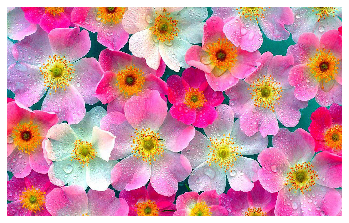

In [4]:
plt.imshow(img)
plt.axis('off')
plt.show()

# Reshape the image

In [0]:
pixels = img.reshape((-1,3))

In [6]:
pixels.shape

(1600000, 3)

In [7]:
pixels[0]

array([241, 220, 251], dtype=uint8)

# Implement KMeans from scratch

In [0]:
def equal_lists(list_a, list_b):
    """
    Compare list_a and list_b and return True if the two list contain the same values
    """
    if len(list_a) != len(list_b):
        return False
    first_set = set(map(tuple, list_a))
    secnd_set = set(map(tuple, list_b))
    return len(first_set.difference(secnd_set)) == 0
    
class KMeans:
    
    def __init__(self, k=2, max_iterations=200):
        
        self.k = k
        self.max_iterations = max_iterations

    def fit(self, points):
        """
        Compute clusters and their center points
        """
        self.centers = {} # a dictionary of cluster number and its center (mean) point

        # Choose k random points as the initial means
        random_points = random.sample(list(points), self.k)
        for i in range(self.k):
            self.centers[i] = random_points[i]

        for i in range(self.max_iterations): # max iterations

            print("iteration: ", i)
            
            self.clusters = {} # a dictionary of cluster number and points in that cluster

            for i in range(self.k): # initially, each cluster contains no point
                self.clusters[i] = []

            pre_clusters = deepcopy(self.clusters) # save clusters for comparing them with new clusters
            
            for point in points:
                # distances of point from each cluster center
                distances = [np.linalg.norm(point - self.centers[center]) for center in self.centers]
                # take cluster with minimum distance
                cluster = distances.index(min(distances))
                # append point to cluster
                self.clusters[cluster].append(point)

            # Update cluster centers
            for c in range(self.k):
                self.centers[c] = np.average(self.clusters[c], axis=0)
                
            # # check if clusters changed or not
            optimized = True
            for c in range(self.k):
                if equal_lists(self.clusters[c], pre_clusters[c]) == False:
                    optimized = False
                    break
                    
            if optimized: # clusters not changed, so stop the iterations
                break


    def predict_cluster(self, point):
        """
        Find cluster number of point
        """
        distances = [np.linalg.norm(point - self.centers[c]) for c in range(self.k)]
        return distances.index(min(distances))

    def predict_center(self, point):
        """
        Find center of the cluster that point belongs to
        """
        return self.centers[self.predict_cluster(point)]
    

# Clustering for k=2

In [9]:
n_clusters = 2
kmeans = KMeans(k=n_clusters, max_iterations=2)
kmeans.fit(pixels)

iteration:  0
iteration:  1


### Create the clustered image and plot it

In [0]:
new_img = [[kmeans.predict_center(pixel) for pixel in row] for row in img]
new_img = np.array(new_img, np.uint8)

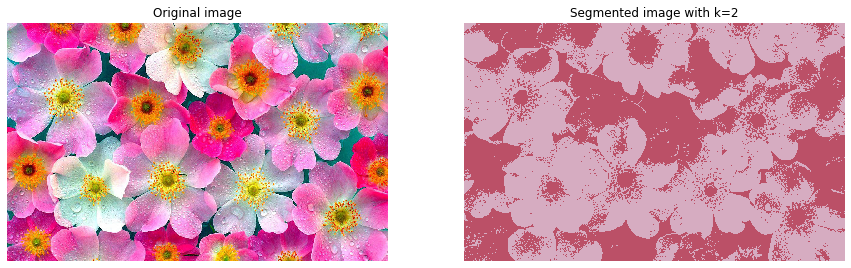

In [11]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

Lets create a method for all theses codes and call it for various parameters

In [0]:
def cluster_and_plot(n_clusters, max_iterations):
    kmeans = KMeans(k=n_clusters, max_iterations=max_iterations)
    kmeans.fit(pixels)

    new_img = [[kmeans.predict_center(pixel) for pixel in row] for row in img]
    new_img = np.array(new_img, np.uint8)

    plt.figure(figsize=(15,15))

    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Original image')

    plt.subplot(1,2,2)
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(f'Segmented image with k={n_clusters} and max_iterations={max_iterations}')

    plt.show()


Processing k=3 with max_iterations=2:
iteration:  0
iteration:  1


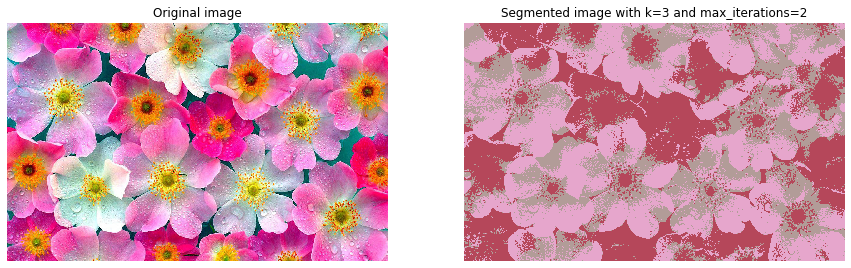

Processing k=3 with max_iterations=4:
iteration:  0
iteration:  1
iteration:  2
iteration:  3


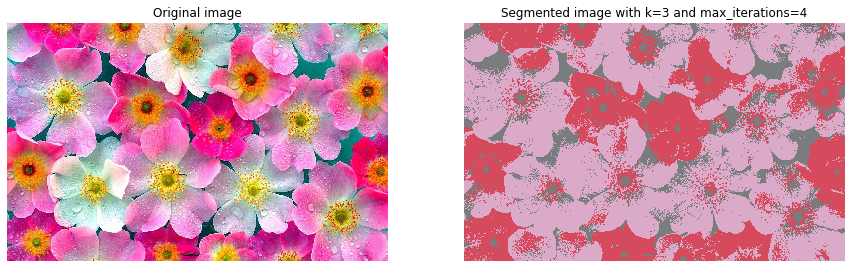

Processing k=3 with max_iterations=8:
iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7


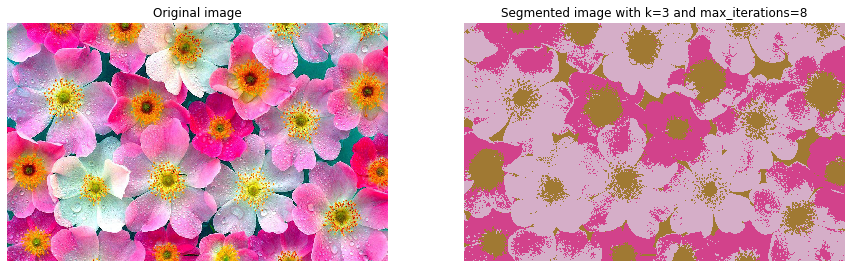

Processing k=4 with max_iterations=2:
iteration:  0
iteration:  1


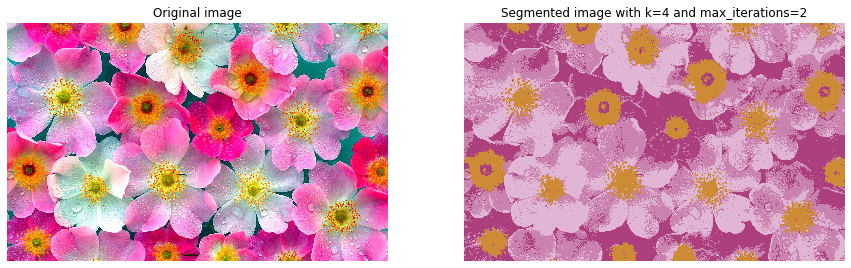

Processing k=4 with max_iterations=4:
iteration:  0
iteration:  1
iteration:  2
iteration:  3


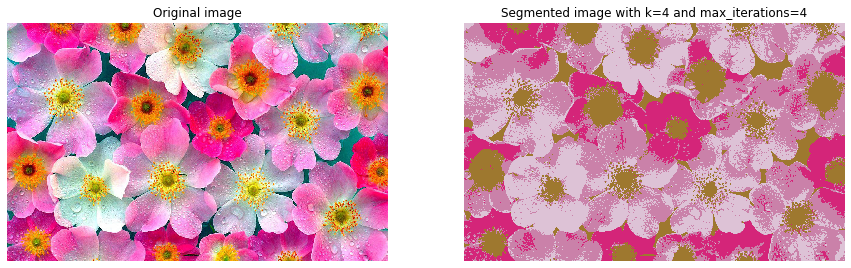

Processing k=4 with max_iterations=8:
iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7


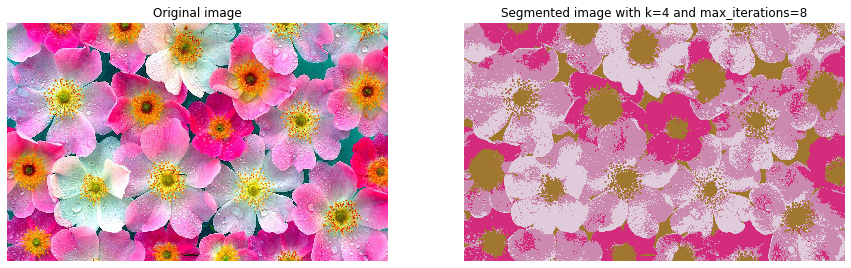

Processing k=5 with max_iterations=2:
iteration:  0
iteration:  1


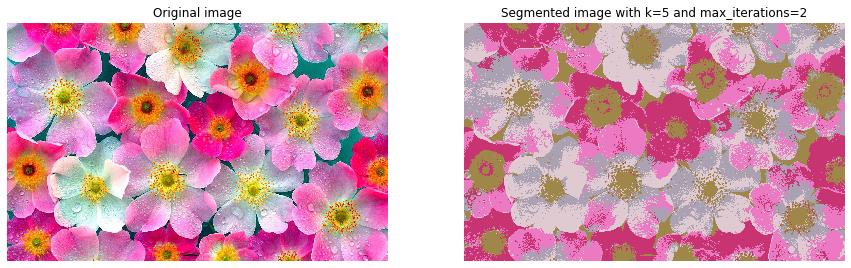

Processing k=5 with max_iterations=4:
iteration:  0
iteration:  1
iteration:  2
iteration:  3


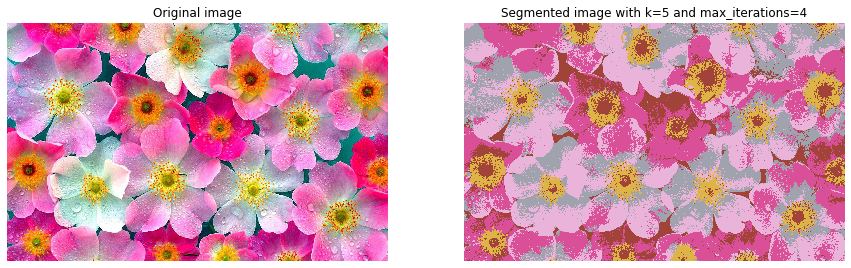

Processing k=5 with max_iterations=8:
iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7


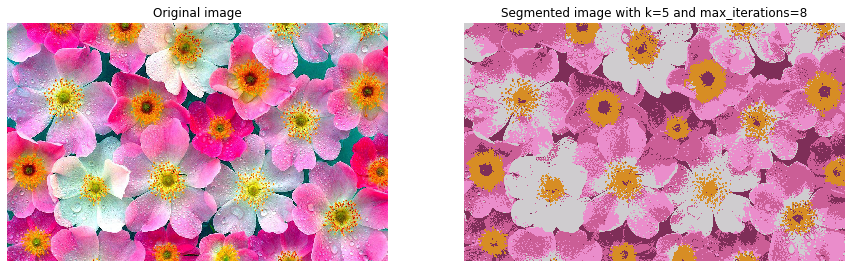

Processing k=6 with max_iterations=2:
iteration:  0
iteration:  1


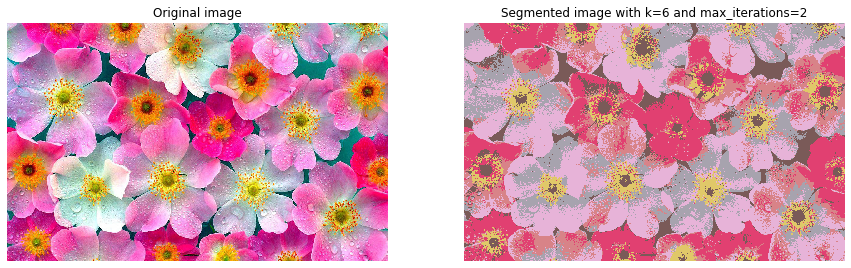

Processing k=6 with max_iterations=4:
iteration:  0
iteration:  1
iteration:  2
iteration:  3


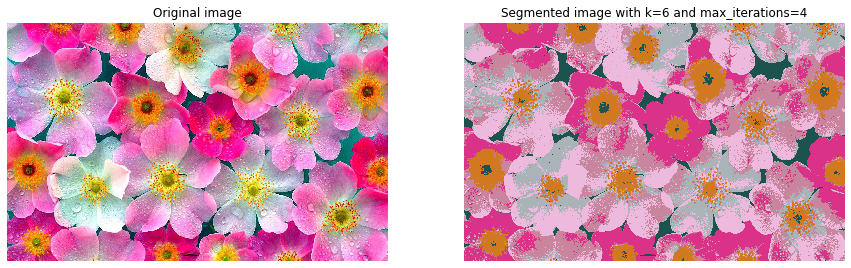

Processing k=6 with max_iterations=8:
iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7


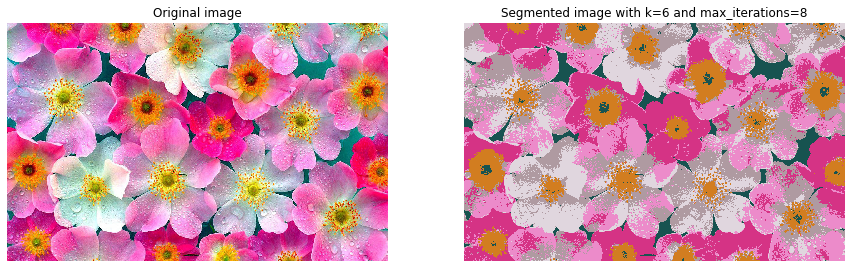

Processing k=7 with max_iterations=2:
iteration:  0
iteration:  1


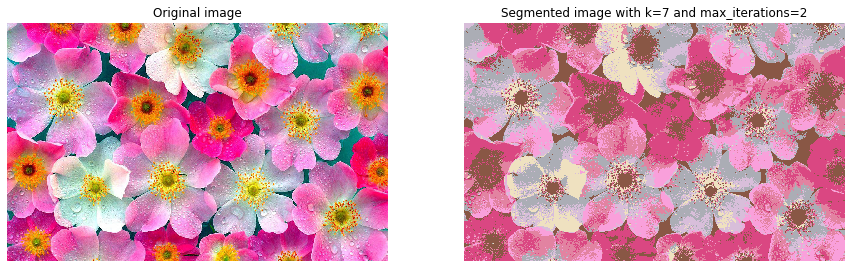

Processing k=7 with max_iterations=4:
iteration:  0
iteration:  1
iteration:  2
iteration:  3


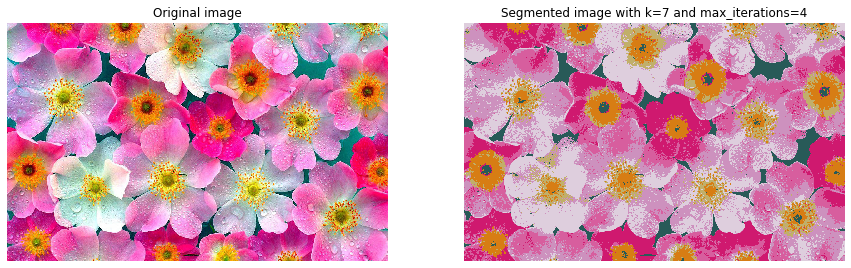

Processing k=7 with max_iterations=8:
iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7


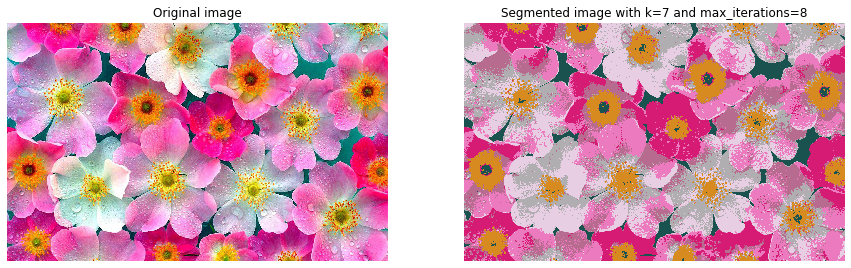

In [13]:
n_clusters = range(3,8)
max_iterations = [2,4,8]
for k in n_clusters:
    for m in max_iterations:
        print(f'Processing k={k} with max_iterations={m}:')
        cluster_and_plot(k,m)